# FDR power curve using results from new simulated data

In [1]:
import pandas as pd, numpy as np
import os
from collections import Counter
cwd = os.path.expanduser("/home/min/GIT/cnv-gene-mapping/output")

In [2]:
m1 = "varbvs"
m2 = "susie"
m3 = "mcmc"
m4 = "sier"
m5 = "hybrid"
m6 = 'fisher'

**Gene names in varbvs, susie and sier are different from those of mcmc, because R (varbvs, susie, sier) change gene names**

## Get ROC / PR data

In [3]:
def get_pip_table(name):
    prefix = f"deletion.X.colnames_b30.{name}.y"
    varbvs = pd.read_csv(f"{cwd}/{name}/{prefix}.{m1}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m1}"])
    susie = pd.read_csv(f"{cwd}/{name}/{prefix}.{m2}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m2}"])
    mcmc = pd.read_csv(f"{cwd}/{name}/{prefix}.{m3}_pip.gz", sep = "\t", header = None, names = ["gene", f"pip_{m3}"])
    sier = pd.read_csv(f"{cwd}/{name}/{prefix}.{m4}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m4}"])
    hybrid = pd.read_csv(f"{cwd}/{name}/{prefix}.{m5}_pip.gz", sep = "\t", header = None, usecols = [1], names = [f"pip_{m5}"])
    fisher = pd.read_csv(f"{cwd}/{name}/{prefix[0:-2]}.X.cleaned.fisher.gz", sep = "\t", header = 0)
    beta_all = np.loadtxt(f"{cwd}/{name}/{prefix[0:-2]}.beta")
    index = pd.read_csv(f"{cwd}/{name}/{prefix[0:-2]}.X.block_index_original.csv", sep = "\t", header = None, names = ["start", "end"])
    betas = list()
    for i, item in index.iterrows():
        betas.extend(list(beta_all[item[0]:(item[1]+1)]))
    pips = pd.concat([mcmc, varbvs, susie, sier, hybrid], axis = 1).merge(fisher[["gene", "p"]], on = "gene")
    pips["beta"] = betas
    pips["is_signal"] = pips["beta"].apply(lambda x: 1 if x != 0 else 0)
    return pips

In [4]:
pips1 = get_pip_table("simu_dele_30_0528")
pips2 = get_pip_table("simu_dele_30_0529")
pips3 = get_pip_table("simu_dele_30_0605")
pips4 = get_pip_table("simu_dele_30_0606")

In [5]:
pips = pd.concat([pips1, pips2, pips3, pips4])

In [6]:
pips = pips.set_index([[i for i in range(pips.shape[0])]])

In [7]:
pips.shape

(11024, 9)

In [8]:
pips.head()

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta,is_signal
0,TTLL10,0.001832,0.056501,0.0,0.010635,0.010635,1.0,0.0,0
1,TNFRSF18,0.001832,0.056500,0.0,0.010635,0.010635,1.0,0.0,0
2,TNFRSF4,0.001832,0.056499,0.0,0.010635,0.010635,1.0,0.0,0
3,SDF4,0.001832,0.056499,0.0,0.010635,0.010635,1.0,0.0,0
4,B3GALT6,0.001832,0.056498,0.0,0.010635,0.010635,1.0,0.0,0


In [9]:
pips0 = pips.sort_values(by = ["pip_sier"])

In [52]:
pips0[(pips0["pip_sier"] <= 0.75) & (pips0["pip_sier"] > 0.70)]

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta,is_signal
185,GPR52,0.65030,0.833652,0.360198,0.711025,0.711025,0.004171,1.228242,1
650,DGKG,0.64770,0.812681,0.256320,0.740832,0.740832,0.011704,0.000000,0
6123,LSAMP,0.66428,0.901517,0.397263,0.749964,0.749964,0.002484,0.000000,0


In [53]:
pips3[(pips3["pip_sier"] <= 0.75) & (pips3["pip_sier"] > 0.70)]

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta,is_signal
611,LSAMP,0.66428,0.901517,0.397263,0.749964,0.749964,0.002484,0.0,0


Original 0528.

In [45]:
pips1_ori = get_pip_table("simu_dele_30_0528")

In [46]:
pips1_ori[(pips1_ori["pip_sier"] <= 0.65) & (pips1_ori["pip_sier"] > 0.60)]

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta,is_signal
416,LINC01941,0.35730,0.657278,0.000000,0.604935,0.604935,0.026549,0.0,0
1942,LINC02207,0.52666,0.721483,0.177924,0.635114,0.635114,0.021463,0.0,0


In [11]:
pips['pip_fisher'] = 1 - pips['p']

In [12]:
pips.tail()

,gene,pip_mcmc,pip_varbvs,pip_susie,pip_sier,pip_hybrid,p,beta,is_signal,pip_fisher
11019,SSTR3,0.003502,0.058353,0.0,0.025688,0.025688,0.54876,0.000000,0,0.45124
11020,RAC2,0.003502,0.058352,0.0,0.025688,0.025688,0.54876,0.000000,0,0.45124
11021,CYTH4,0.003502,0.058350,0.0,0.025688,0.025688,0.54876,0.000000,0,0.45124
11022,ELFN2,0.003502,0.058349,0.0,0.025688,0.025688,0.54876,1.006945,1,0.45124
11023,LOC100506271,0.003502,0.058347,0.0,0.025688,0.025688,0.54876,0.000000,0,0.45124


In [13]:
roc_data = function(dat, cols, cutoff = c(0.05, 0.999), connect_org = TRUE, grid = 100) {
    d1 = dat[,cols]
    if (connect_org) start = 0
    else start = 1
    ttv = (start:grid)/grid
    ttv = ttv[which(ttv>=cutoff[1] & ttv<=cutoff[2])]
    rst1 = t(sapply(ttv, function(x) c(sum(d1[,2][d1[,1]>=x]), length(d1[,2][d1[,1]>=x]), sum(d1[,2][d1[,1]>=x]==0))))
    rst1 = cbind(rst1, sum(d1[,2]), sum(1-d1[,2]))
    rst1 = as.data.frame(rst1)
    colnames(rst1) = c('true_positive', 'total_positive', 'false_positive', 'total_signal', 'total_null')
    rst2 = as.data.frame(cbind(rst1$true_positive / rst1$total_positive, rst1$true_positive / rst1$total_signal,  ttv))
    rst3 = as.data.frame(cbind(1 - rst1$false_positive / rst1$total_null, rst1$true_positive / rst1$total_signal,  ttv))
    if (connect_org) {
        # make a stair to origin
        rst2 = rbind(rst2, c(max(1 - cutoff[1], rst2[nrow(rst2),1]), max(rst2[nrow(rst2),2]-0.01, 0), rst2[nrow(rst2),3]))
        rst2 = rbind(rst2, c(1, 0, 1))
        rst3 = rbind(rst3, c(1, 0, 1))
    }
    colnames(rst2) = c('Precision', 'Recall', 'Threshold')
    colnames(rst3) = c('TN', 'TP', 'Threshold')
    return(list(counts = rst1, pr = rst2, roc = rst3))
}

In [14]:
%get pips m1 m2 m3 m4 m5 m6 --from Python3

In [15]:
res = list()
for (m in c(m1,m2,m3,m4,m5,m6)) res[[m]] = roc_data(pips, c(paste0('pip_',m), 'is_signal'), cutoff = c(0, 1), connect_org = T, grid=200)

In [16]:
%get res --from R

## Plot ROC

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=24)

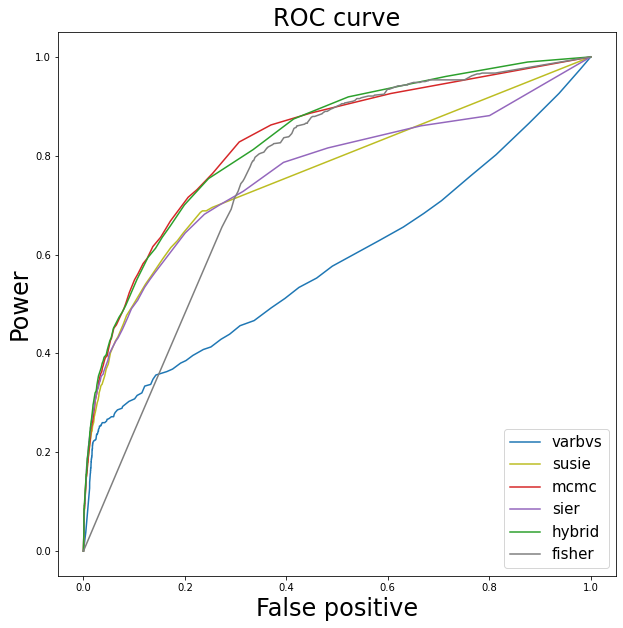

In [18]:
fig, ax = plt.subplots(figsize = (10, 10))
for m, c in zip([m1,m2,m3,m4,m5,m6], ['C0','C8','C3','C4','C2','C7']):
    plt.plot(1 - res[m]['roc']['TN'], res[m]['roc']['TP'], c = c, label = m)
plt.legend(loc = 'lower right', fontsize = 15)
plt.ylabel("Power", fontproperties=font_prop)
plt.xlabel("False positive", fontproperties=font_prop)
plt.title('ROC curve', fontproperties=font_prop)
plt.savefig(f"{cwd}/ROC_4simu_0611.pdf")
plt.show()

## Plot PR

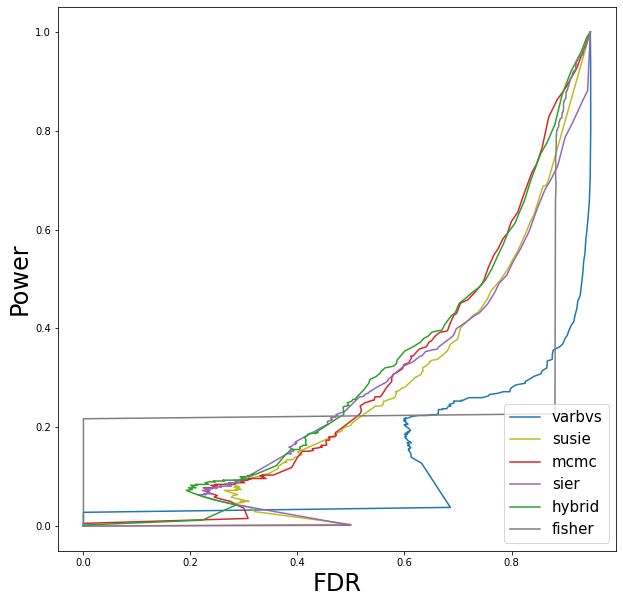

In [19]:
fig, ax = plt.subplots(figsize = (10, 10))
for m, c in zip([m1,m2,m3,m4,m5,m6], ['C0','C8','C3','C4','C2','C7']):
    plt.plot(1 - res[m]['pr']['Precision'], res[m]['pr']['Recall'], c = c, label = m)
plt.legend(loc = 'lower right', fontsize = 15)
plt.ylabel("Power", fontproperties=font_prop)
plt.xlabel("FDR", fontproperties=font_prop)
plt.savefig(f"{cwd}/FDR_power_4simu_0611.pdf")
plt.show()

## 1st version FDR, actually ROC

In [16]:
cutoffs = [0.025*i for i in range(0,41)]

In [17]:
n1 = pips.shape[0]
n2 = sum(pips["is_signal"])

In [18]:
n1, n2

(5512, 272)

In [19]:
res2 = pd.DataFrame({"cutoff": cutoffs})

In [20]:
for x in [f"pip_{m1}", f"pip_{m2}", f"pip_{m3}", f"pip_{m4}", f"pip_{m5}", "p"]:
    res2[f"{x}_FDR"] = [sum(pips[x]>=i)/n1 for i in cutoffs]
    res2[f"{x}_power"] = [pips[(pips[x]>=i) & (pips["is_signal"] == 1)].shape[0]/n2 for i in cutoffs]

In [21]:
res2.head()

,cutoff,pip_varbvs_FDR,pip_varbvs_power,pip_susie_FDR,pip_susie_power,pip_mcmc_FDR,pip_mcmc_power,pip_sier_FDR,pip_sier_power,pip_hybrid_FDR,pip_hybrid_power,p_FDR,p_power
0,0.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.025,0.761430,0.750000,0.216800,0.639706,0.278483,0.757353,0.359579,0.742647,0.373549,0.816176,0.679608,0.268382
2,0.050,0.541183,0.617647,0.146226,0.551471,0.163099,0.632353,0.168541,0.584559,0.189405,0.661765,0.646589,0.216912
3,0.075,0.384253,0.507353,0.098694,0.470588,0.113570,0.529412,0.109761,0.500000,0.121009,0.547794,0.622279,0.194853
4,0.100,0.271045,0.426471,0.066945,0.386029,0.078556,0.452206,0.075472,0.441176,0.083273,0.481618,0.602141,0.169118


In [22]:
res2.tail()

,cutoff,pip_varbvs_FDR,pip_varbvs_power,pip_susie_FDR,pip_susie_power,pip_mcmc_FDR,pip_mcmc_power,pip_sier_FDR,pip_sier_power,pip_hybrid_FDR,pip_hybrid_power,p_FDR,p_power
36,0.900,0.021952,0.172794,0.004354,0.062500,0.005443,0.084559,0.005624,0.091912,0.005987,0.099265,0.186321,0.040441
37,0.925,0.021589,0.165441,0.004173,0.058824,0.005443,0.084559,0.005261,0.084559,0.005624,0.091912,0.183781,0.040441
38,0.950,0.020864,0.154412,0.003810,0.055147,0.005443,0.084559,0.005080,0.080882,0.005624,0.091912,0.182511,0.040441
39,0.975,0.019775,0.147059,0.003266,0.044118,0.004717,0.073529,0.004717,0.077206,0.005261,0.088235,0.182148,0.040441
40,1.000,0.006168,0.040441,0.000363,0.003676,0.001270,0.018382,0.000000,0.000000,0.000907,0.014706,0.182148,0.040441


INFO: NumExpr defaulting to 8 threads.

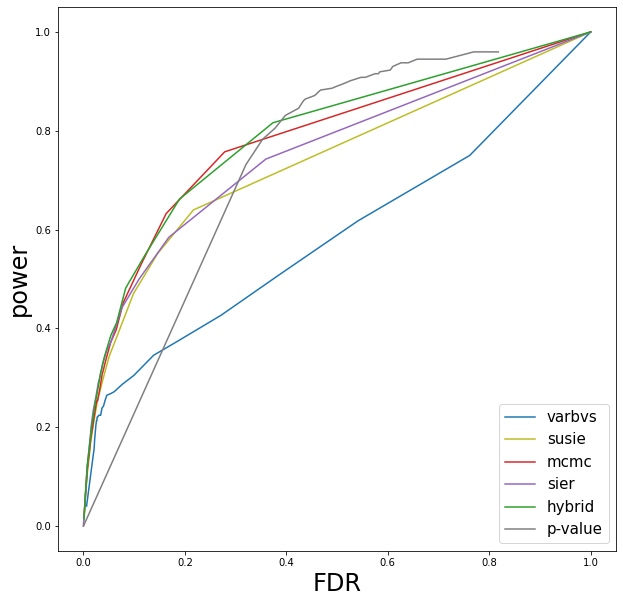

## PIP calibration

In [20]:
calib = pips[[f"pip_{m1}", f"pip_{m2}", f"pip_{m3}", f"pip_{m4}", f"pip_{m5}", "is_signal"]]

In [21]:
calib.tail()

,pip_varbvs,pip_susie,pip_mcmc,pip_sier,pip_hybrid,is_signal
11019,0.058353,0.0,0.003502,0.025688,0.025688,0
11020,0.058352,0.0,0.003502,0.025688,0.025688,0
11021,0.058350,0.0,0.003502,0.025688,0.025688,0
11022,0.058349,0.0,0.003502,0.025688,0.025688,1
11023,0.058347,0.0,0.003502,0.025688,0.025688,0


In [22]:
%get calib --from Python3

In [23]:
library(ggplot2)
library(cowplot)
library(dplyr)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [32]:
bin_size = 20
bins = cbind(seq(1:bin_size)/bin_size-1/bin_size, seq(1:bin_size)/bin_size)

In [33]:
pip_cali = list()
for (name in rev(colnames(calib))[-1]) {
    for (i in 1:nrow(bins)) {
        tmp = calib[which(calib[[name]] > bins[i,1] & calib[[name]] < bins[i,2]), ]
        if (is.null(pip_cali[[name]])) pip_cali[[name]] = c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal))
        else pip_cali[[name]] = rbind(pip_cali[[name]], c(sum(tmp[[name]]), sum(tmp$is_signal), length(tmp$is_signal)))
    }
    pip_cali[[name]][which(is.na(pip_cali[[name]]))] = 0
}

In [34]:
get_cali = function(alist, col) {
    res = alist[[col]]
    if (!is.null(alist[[col]])) res = res + alist[[col]]
    res[,c(1,2)] = res[,c(1,2)] / res[,3]
    return(res[-1,])
}

In [35]:
dat = list("varbvs" = get_cali(pip_cali, 'pip_varbvs'),
           "susie" = get_cali(pip_cali, 'pip_susie'),
           "pymc3" = get_cali(pip_cali, 'pip_mcmc'), 
           "sier" = get_cali(pip_cali, 'pip_sier'),
           "hybrid" = get_cali(pip_cali, 'pip_hybrid'))

In [36]:
names(dat)

[1] "varbvs" "susie"  "pymc3"  "sier"   "hybrid"

In [37]:
dot_plot = function(dataframe) {
  ggplot(dataframe, aes(x=mean_pip, y=observed_freq)) +
    geom_errorbar(aes(ymin=observed_freq-se, ymax=observed_freq+se), colour="gray", size = 0.2, width=.01) +
    geom_point(size=1.5, shape=21, fill="#002b36") +
    xlab("Mean PIP") +
    ylab("Observed frequency") +
    coord_cartesian(ylim=c(0,1), xlim=c(0,1)) +
    geom_abline(slope=1,intercept=0,colour='red', size=0.2) +
    ggtitle(name) +
    expand_limits(y=0) + 
    theme_cowplot()
}

In [38]:
idx = 0
date = "0611"
for (name in names(dat)) {
    idx = idx + 1
    dat[[name]][,3] = sqrt(dat[[name]][,2] * (1 - dat[[name]][,2]) / dat[[name]][,3]) * 2
    dat[[name]] = as.data.frame(dat[[name]])
    colnames(dat[[name]]) = c("mean_pip", "observed_freq", "se")
    pdf(paste0("/home/min/GIT/cnv-gene-mapping/output/", name, '_' , bin_size, '_', date, '.pdf'), width=3, height=3, pointsize=16)
    print(dot_plot(dat[[name]]))
    dev.off()
    system(paste0("convert -flatten -density 120 ", "/home/min/GIT/cnv-gene-mapping/output/", name, '_' , bin_size, '_', date, '.pdf', " ", 
                  "/home/min/GIT/cnv-gene-mapping/output/", name, '_' , bin_size, '_', date, '.png'))
    }

Warning message:
“Removed 1 rows containing missing values (geom_point).”


In [39]:
bin_size

[1] 20

## ROC

In [34]:
cutoffs = [0.025*i for i in range(0,41)]

In [35]:
cutoffs1 = cutoffs[::-1]

In [37]:
res1 = pd.DataFrame({"cutoff": cutoffs1})

In [40]:
n3 = pips[pips["is_signal"] == 1].shape[0]
n4 = pips.shape[0]

In [41]:
n3,n4

(581, 11024)

In [43]:
n3 = pips[pips["is_signal"] == 1].shape[0]
n4 = pips[pips["is_signal"] == 0].shape[0]
for x in [f"pip_{m1}", f"pip_{m2}", f"pip_{m3}", f"pip_{m4}", f"pip_{m5}", "p"]:
    res1[f"{x}_TPR"] = [pips[(pips["is_signal"] == 1) & (pips[x] >= i)].shape[0] / n3 for i in cutoffs1]
    res1[f"{x}_FPR"] = [pips[(pips["is_signal"] == 0) & (pips[x] >= i)].shape[0] / n4 for i in cutoffs1]

In [44]:
res1.head()

,cutoff,pip_varbvs_TPR,pip_varbvs_FPR,pip_susie_TPR,pip_susie_FPR,pip_mcmc_TPR,pip_mcmc_FPR,pip_sier_TPR,pip_sier_FPR,pip_hybrid_TPR,pip_hybrid_FPR,p_TPR,p_FPR
0,1.000,0.037866,0.004596,0.003442,0.000192,0.015491,0.000383,0.010327,0.000287,0.012048,0.000192,0.032702,0.187015
1,0.975,0.154905,0.013406,0.037866,0.000958,0.058520,0.001053,0.063683,0.001149,0.070568,0.000958,0.032702,0.187015
2,0.950,0.163511,0.014172,0.044750,0.000958,0.072289,0.001245,0.067126,0.001245,0.074010,0.001053,0.032702,0.187207
3,0.925,0.168675,0.014842,0.048193,0.001149,0.075731,0.001245,0.068847,0.001245,0.077453,0.001053,0.032702,0.188452
4,0.900,0.175559,0.014938,0.049914,0.001245,0.075731,0.001245,0.074010,0.001341,0.080895,0.001149,0.032702,0.192282


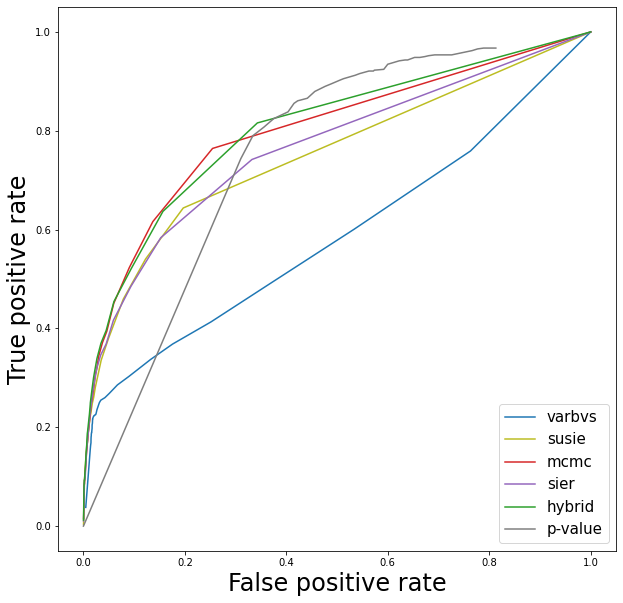

In [45]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.plot(res1[f"pip_{m1}_FPR"], res1[f"pip_{m1}_TPR"], c = "C0", label = m1)
plt.plot(res1[f"pip_{m2}_FPR"], res1[f"pip_{m2}_TPR"], c = "C8", label = m2)
plt.plot(res1[f"pip_{m3}_FPR"], res1[f"pip_{m3}_TPR"], c = "C3", label = m3)
plt.plot(res1[f"pip_{m4}_FPR"], res1[f"pip_{m4}_TPR"], c = "C4", label = m4)
plt.plot(res1[f"pip_{m5}_FPR"], res1[f"pip_{m5}_TPR"], c = "C2", label = m5)
plt.plot(1-res1["p_FPR"], 1-res1["p_TPR"], c = "C7", label = "p-value")
plt.legend(loc = 'lower right', fontsize = 15)
plt.xlabel("False positive rate", fontproperties=font_prop)
plt.ylabel("True positive rate", fontproperties=font_prop)
plt.show()